In [3]:
# Core packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing & ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

In [4]:
# Load CSV data
data = pd.read_csv("Churn_Modelling.csv")

# Preview structure
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Drop ID-like fields that won't help in prediction
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Show remaining columns
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [6]:
# Encode Gender (Male = 1, Female = 0)
gender_map = {'Male': 1, 'Female': 0}
data['Gender'] = data['Gender'].map(gender_map)

# One-hot encode Geography (drop one to avoid dummy trap)
geo_encoded = pd.get_dummies(data['Geography'], prefix='Geo', drop_first=True)
data = pd.concat([data.drop('Geography', axis=1), geo_encoded], axis=1)

In [7]:
# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=7, stratify=y)

In [8]:
# Build the model
rf_model = RandomForestClassifier(n_estimators=150, max_depth=8, random_state=101)
rf_model.fit(X_train, y_train)

# Predictions
predictions = rf_model.predict(X_test)

Model Accuracy: 86.27%

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.81      0.43      0.56       611

    accuracy                           0.86      3000
   macro avg       0.84      0.70      0.74      3000
weighted avg       0.86      0.86      0.85      3000



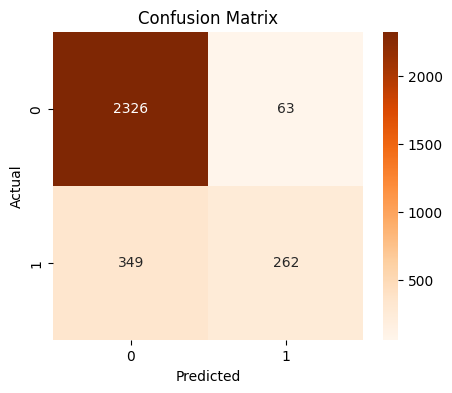

In [9]:
# Accuracy & Metrics
acc = accuracy_score(y_test, predictions)
print("Model Accuracy: {:.2f}%".format(acc * 100))

print("\nCLASSIFICATION REPORT:\n")
print(classification_report(y_test, predictions))

# Confusion matrix plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()